In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline

xlsx = pd.ExcelFile('dados.xlsx')
df1 = pd.read_excel (xlsx, 'realizado', index_col=0, skiprows=0)
df2 = pd.read_excel (xlsx, 'orcado')
df1_t = df1.T
df1_t.columns = ['mês','realizado']
df1_t['realizado'] = pd.to_numeric(df1_t['realizado'])
df = pd.merge(df2,df1_t,on='mês')
df['diff'] = df['orcado'].sub(df['realizado'], axis=0)
df.set_index('mês')
print(df)
df.to_csv('dados_saida_Desafio.csv', index=False)

          mês  orcado  realizado  diff
0     janeiro     330        240    90
1   fevereiro     290        280    10
2       março     230        200    30
3       abril     321        310    11
4        maio     283        230    53
5       junho     291        213    78
6       julho     193        239   -46
7      agosto     259        210    49
8    setembro     289        210    79
9     outubro     230        210    20
10   novembro     434        232   202
11   dezembro     421        213   208


In [2]:
df_orcado = df[['orcado']]
df_realizado = df[['realizado']]
orcado = df_orcado.T
realizado = df_realizado.T
real = df['realizado'].to_numpy() #y
orc = df['orcado'].to_numpy() #y2
mes = df['mês'].to_numpy() #labels

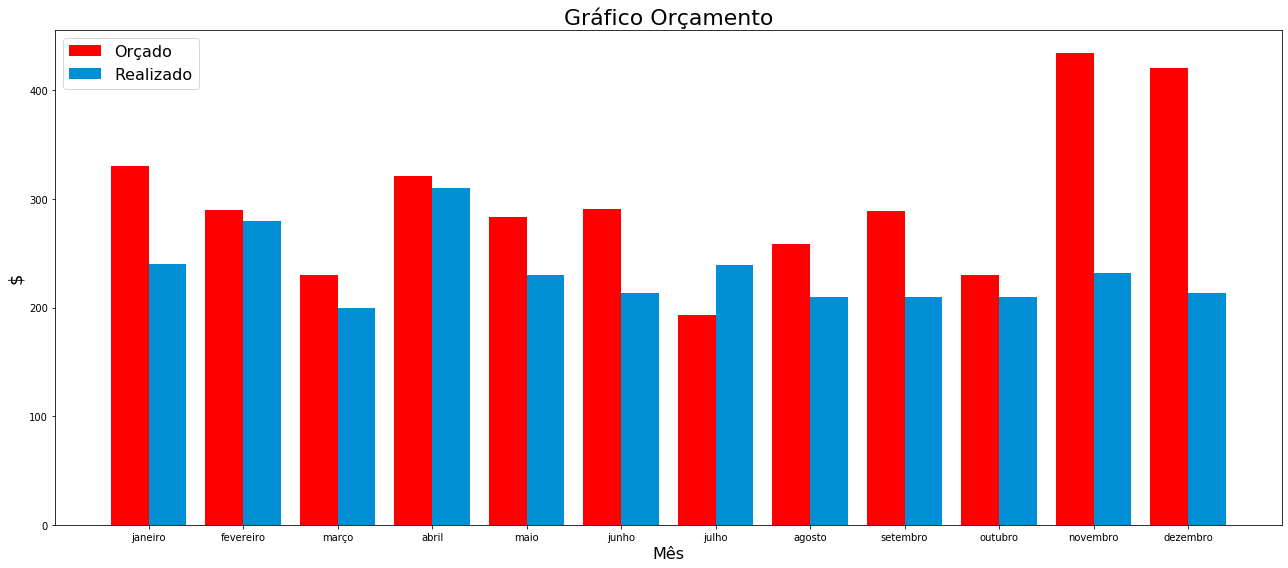

In [3]:
x_indexes = np.arange(len(mes))
width = 0.4
plt.figure(figsize=(18, 8))

plt.bar(x_indexes - width/2, orc, width, color="red", label="Orçado")
plt.bar(x_indexes + width/2, real, width, color="#008fd5", label="Realizado")

plt.xticks(ticks=x_indexes, labels=mes)

plt.title("Gráfico Orçamento", fontsize = 22)
plt.xlabel("Mês", fontsize = 16)
plt.ylabel("$", fontsize = 18)
plt.legend(loc='upper left', fontsize = 16)

plt.tight_layout()
#plt.show()
plt.savefig('plotdata.png')